# Predicting heart disease using machine learning

This notebook use Python based ML and data science libraries in an attempt to build a ML model capable of predicting whether or not someone has heart disease.


Project steps:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. problem definiton

It is going to predict whether the patient has a heart disease or not.

## 2. Data 

the original data came form the UCI ML repo. 
http://archive.ics.uci.edu/ml/datasets/heart+Disease



## 3. Evaluation

If we can reach 95% accuracy at predicting whether a patient has heart disease or not.

## 4. Features

** create data dictionary **
1. age: age in years
2. sex: sex (1 = male; 0 = female)
3. cp: chest pain type
* -- Value 0: typical angina
* -- Value 1: atypical angina
* -- Value 2: non-anginal pain
* -- Value 3: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
* -- Value 0: normal
* -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression * of > 0.05 mV)
* -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
* -- Value 0: upsloping
* -- Value 1: flat
* -- Value 2: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
* and the label
14. condition: 0 = no disease, 1 = disease

In [5]:
# regular EDA exploratory data analysis and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
 
# Model Evaluations
from sklearn.model_selection import train_test_split,cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report, precision_score, recall_score, f1_score, RocCurveDisplay


In [7]:
df = pd.read_csv('heart-disease.csv')
df.shape

(303, 14)

## Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject a subject matter export on the dataset you're working wiht.

1. What questions are you trying to solve
2. What kind of data do we have and how do we treat different types?
3. What's missing form the data and how do you deal with it?
4. Wherer are the outliers and why shoudl you care about them?
5. How can you add, change or remove features to get more out of your data?

In [9]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [10]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

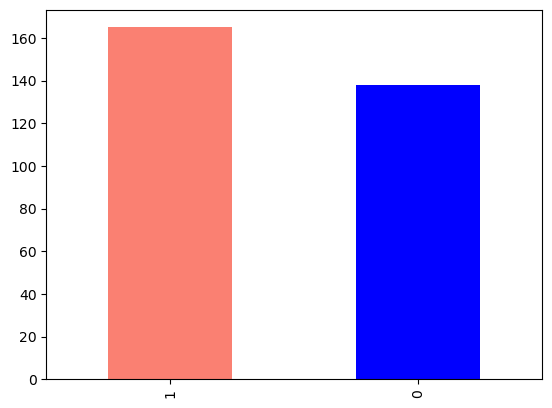

In [27]:
df['target'].value_counts().plot(kind='bar', color=['salmon', 'blue']);

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [29]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [30]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart Disease Frequency accoring to Sex

In [32]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [34]:
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [35]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

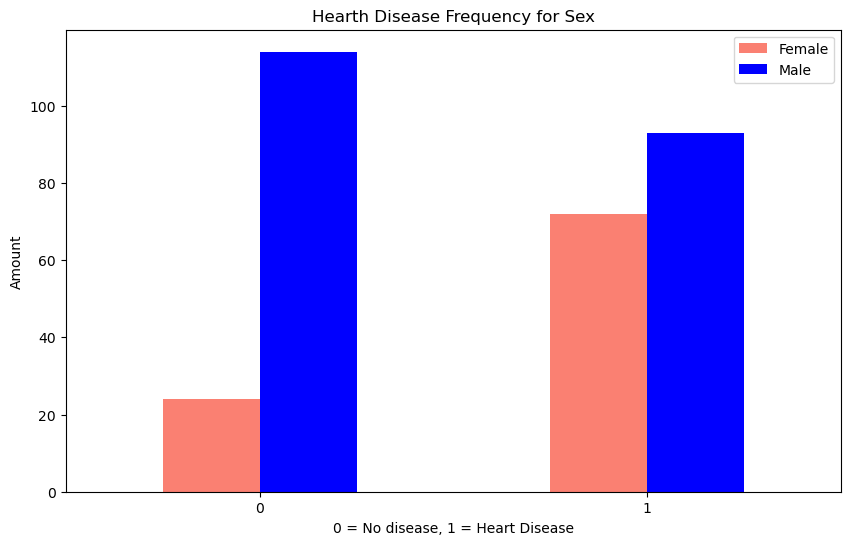

In [37]:
pd.crosstab(df.target, df.sex).plot(kind='bar', figsize=(10,6), color=['salmon','blue'])

plt.title('Hearth Disease Frequency for Sex')
plt.xlabel('0 = No disease, 1 = Heart Disease')
plt.ylabel('Amount')
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0)

Age vs Max heart rate for heart disease


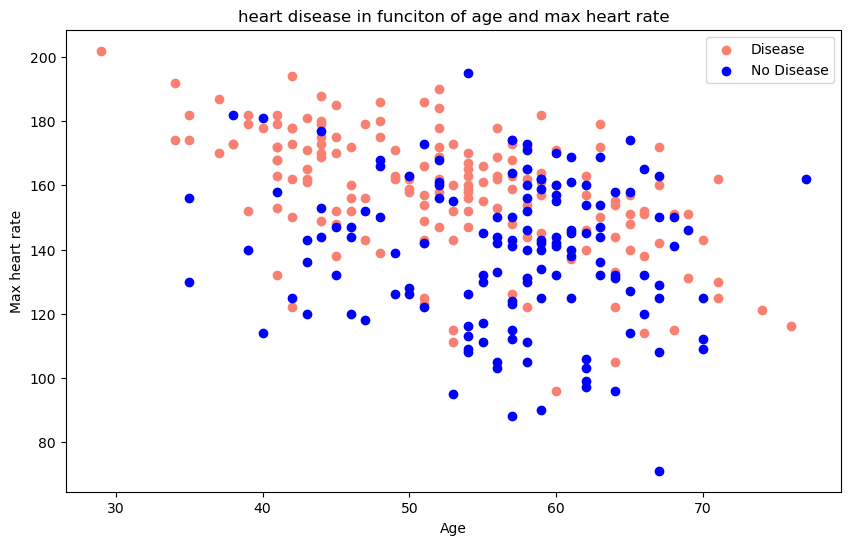

In [43]:
plt.figure(figsize=(10,6))

plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c='salmon')

plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c='blue')

plt.title('heart disease in funciton of age and max heart rate')
plt.xlabel('Age')
plt.ylabel('Max heart rate')
plt.legend(['Disease', 'No Disease'])
plt.show()

<AxesSubplot: ylabel='Frequency'>

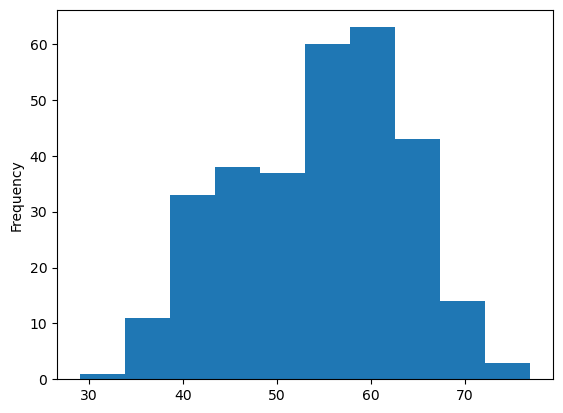

In [44]:
df.age.plot(kind='hist')

## Heart Disease Frequency per Chest Pain type 

3. cp: chest pain type
* -- Value 0: typical angina: chest pain related decrease blood supply to the heart
* -- Value 1: atypical angina: chest pain not related heart
* -- Value 2: non-anginal pain: typically esophageal spasms (non heart-related_)
* -- Value 3: asymptomatic: chest pain not showing signs of disease

In [45]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


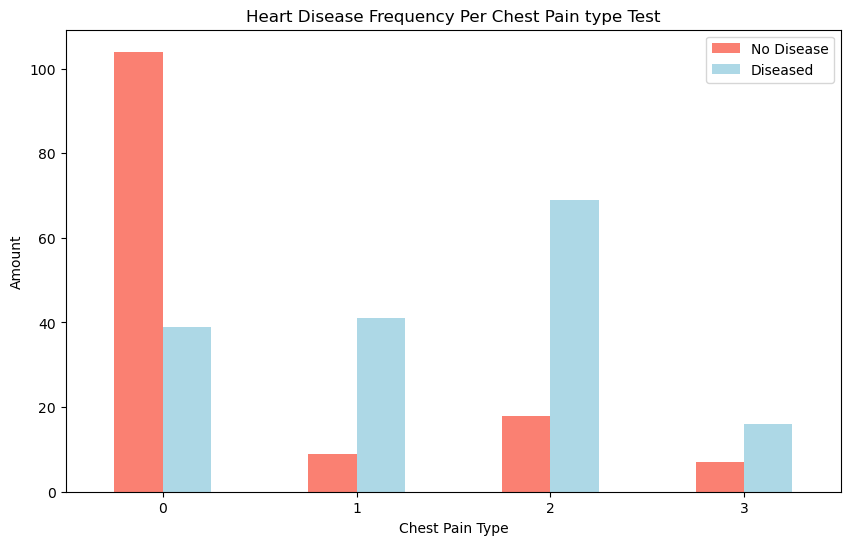

In [50]:
pd.crosstab(df.cp, df.target).plot(kind='bar', figsize=(10, 6), color=['salmon', 'lightblue'])



plt.title('Heart Disease Frequency Per Chest Pain type Test')
plt.xlabel('Chest Pain Type')
plt.ylabel('Amount')
plt.legend(['No Disease', 'Diseased'])

plt.xticks(rotation=0)
plt.show()